## Loading data

In [ ]:
import pandas as pd

pulse_loaded = pd.read_csv('./Community Pulse Complete v1.csv')

pulse_loaded.head(2)

for idx, col in enumerate(pulse_loaded.columns):
    print(f"{idx}: {col}")

## Checking to see how many chose 2 or more race categories

In [5]:
x = pulse_loaded.iloc[:, -10:]
x = pd.get_dummies(x)

In [6]:
x.head(2)

,"African American, Black_African American, Black.","East Asian_East Asian (including Chinese, Japanese, Korean, Mongolian, Tibetan, and Taiwanese)",Hispanic/Latinx_Hispanic/Latinx.,Middle Eastern_Middle Eastern.,Native American/Alaska Native/First Nations._Native American/Alaska Native/First Nations.,Pacific Islander._Pacific Islander.,"South Asian_South Asian (including Bangladeshi, Bhutanese, Indian, Nepali, Pakistani, and Sri Lankan)","Southeast Asian_Southeast Asian (including Burmese, Cambodian, Filipino, Hmong, Indonesian, Laotian, Malaysian, Mien, Singaporean, Thai, and Vietnamese)",White_White,Other_Other
0,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False


In [7]:
xx = x.assign(newcol=x[:].sum(axis=1))
print(xx.newcol)

0      1
1      1
2      1
3      2
4      1
      ..
791    2
792    0
793    0
794    1
795    1
Name: newcol, Length: 796, dtype: int64


In [8]:
xx.newcol.value_counts()

newcol
1    644
0     84
2     60
3      7
9      1
Name: count, dtype: int64

## Creating dummies for race values in the set

In [9]:
# Create dummy variables for the last 10 columns
dummies = pd.get_dummies(pulse_loaded.iloc[:, -10:])

# Concatenate the dummy variables with the rest of the dataframe
pulse_loaded = pd.concat([pulse_loaded.iloc[:, :-10], dummies], axis=1)

# Check the first two rows
pulse_loaded.head(2)

,Consent,I primarily work in:,Employer Academia,Employer Industry,Academia Role,Industry Role,Industry Other Role,Highest Degree,Career Status,My employer states that they value DEI (whether or not they implement it),...,"African American, Black_African American, Black.","East Asian_East Asian (including Chinese, Japanese, Korean, Mongolian, Tibetan, and Taiwanese)",Hispanic/Latinx_Hispanic/Latinx.,Middle Eastern_Middle Eastern.,Native American/Alaska Native/First Nations._Native American/Alaska Native/First Nations.,Pacific Islander._Pacific Islander.,"South Asian_South Asian (including Bangladeshi, Bhutanese, Indian, Nepali, Pakistani, and Sri Lankan)","Southeast Asian_Southeast Asian (including Burmese, Cambodian, Filipino, Hmong, Indonesian, Laotian, Malaysian, Mien, Singaporean, Thai, and Vietnamese)",White_White,Other_Other
0,Yes,Academia,Tulane University,Amgen,PhD student,NaN,NaN,Master’s,Working towards degree,Strongly agree,...,False,True,False,False,False,False,False,False,False,False
1,Yes,Academia,Boston University,Bitdefender,PhD student,NaN,NaN,Master’s,Working towards degree,Strongly agree,...,False,False,False,False,False,False,False,False,True,False


In [10]:
data = pulse_loaded.copy()

## Renaming race columns to shorter names

In [11]:
# Define a dictionary with old column names and new shorter names
race_column_rename = {
    'African American, Black_African American, Black.': 'Black',
    'East Asian_East Asian (including Chinese, Japanese, Korean, Mongolian, Tibetan, and Taiwanese)': 'East Asian',
    'Hispanic/Latinx_Hispanic/Latinx.': 'Hispanic/Latinx',
    'Middle Eastern_Middle Eastern.': 'Middle Eastern',
    'Native American/Alaska Native/First Nations._Native American/Alaska Native/First Nations.': 'Native American',
    'Pacific Islander._Pacific Islander.': 'Pacific Islander',
    'South Asian_South Asian (including Bangladeshi, Bhutanese, Indian, Nepali, Pakistani, and Sri Lankan)': 'South Asian',
    'Southeast Asian_Southeast Asian (including Burmese, Cambodian, Filipino, Hmong, Indonesian, Laotian, Malaysian, Mien, Singaporean, Thai, and Vietnamese)': 'Southeast Asian',
    'White_White': 'White',
    'Other_Other': 'Other'
}

# Rename the race columns in the dataframe
data.rename(columns=race_column_rename, inplace=True)

# Check if the columns have been renamed
print(data.columns[-10:])

Index(['Black', 'East Asian', 'Hispanic/Latinx', 'Middle Eastern',
       'Native American', 'Pacific Islander', 'South Asian', 'Southeast Asian',
       'White', 'Other'],
      dtype='object')


## MA race breakdown 

In [12]:
# Step 1: Filter the dataframe for those who responded "yes", "no", and blanks in column 29
yes_responses = data[data.iloc[:, 29] == 'Yes']
no_responses = data[data.iloc[:, 29] == 'No']
blank_responses = data[data.iloc[:, 29].isna()]

# Step 2: Select the relevant columns for race (the last 10 columns)
race_columns = data.columns[-10:]

# Step 3: Create tables of race columns for each group
yes_race_breakdown = yes_responses[race_columns]
no_race_breakdown = no_responses[race_columns]
blank_race_breakdown = blank_responses[race_columns]

# Step 4: Summarize the tables (optional)
yes_race_summary = yes_race_breakdown.sum()
no_race_summary = no_race_breakdown.sum()
blank_race_summary = blank_race_breakdown.sum()

# Display the race summaries for comparison
print("Yes responses race breakdown:")
print(yes_race_summary)

print("\nNo responses race breakdown:")
print(no_race_summary)

print("\nBlank responses race breakdown:")
print(blank_race_summary)

Yes responses race breakdown:
Black               20
East Asian          27
Hispanic/Latinx     11
Middle Eastern      13
Native American      0
Pacific Islander     0
South Asian         19
Southeast Asian      7
White               92
Other                9
dtype: int64

No responses race breakdown:
Black               15
East Asian          43
Hispanic/Latinx     11
Middle Eastern      14
Native American      2
Pacific Islander     1
South Asian         29
Southeast Asian      8
White               82
Other                2
dtype: int64

Blank responses race breakdown:
Black                54
East Asian           48
Hispanic/Latinx      28
Middle Eastern       25
Native American       1
Pacific Islander      1
South Asian          69
Southeast Asian       8
White               140
Other                15
dtype: int64


In [13]:
# Step 1: Filter the dataframe for those who responded "yes" in column 29
yes_responses = data[data.iloc[:, 29] == 'Yes']

# Step 2: Select columns 30-43 and race columns (the last 10 columns)
selected_columns = data.columns[30:44]  # Selecting columns 30-43
race_columns = data.columns[-10:]  # Assuming last 10 columns are race

# Step 3: Create a breakdown of responses by race for each column (30-43)
# Loop through each column 30-43 and generate a race breakdown for each
for col in selected_columns:
    print(f"\nRace breakdown for column: {col}")
    
    # Group by the race columns and the response in the current column
    breakdown = yes_responses.groupby([col])[race_columns].sum()
    
    # Print the breakdown
    print(breakdown)


Race breakdown for column: Comments on diversity hires and that you do not deserve your role but got the position due to your under-represented characteristics.
                                                    Black  East Asian  \
Comments on diversity hires and that you do not...                      
Multiple times a month                                  1           1   
Multiple times a year                                   8          11   
NA/I don't know                                         2           1   
Never                                                   7          13   
Prefer not to say                                       2           0   

                                                    Hispanic/Latinx  \
Comments on diversity hires and that you do not...                    
Multiple times a month                                            1   
Multiple times a year                                             5   
NA/I don't know                           

Gender & sexual orientation

## MA gender breakdown

In [14]:
# View the unique entries in column 72
print("Unique entries in column 72 (Gender/Pronouns):")
print(data.iloc[:, 72].unique())

Unique entries in column 72 (Gender/Pronouns):
['Woman' 'Man' nan 'Genderqueer' 'Prefer not to say' 'Non-binary'
 'Gender non-conforming' 'Non-binary woman' 'Questioning' 'Genderfluid'
 'Agender']


In [15]:
# Import numpy for handling NaN values
import numpy as np

# Define a function to categorize gender entries
def categorize_gender(gender):
    if gender == 'Man' or gender == 'Woman':
        return gender
    elif pd.isna(gender):
        return np.nan  # Keep NaN values as they are
    else:
        return 'Other Gender Identities'  # Group all other gender identities

# Apply the function to column 72
data['Gender Grouped'] = data.iloc[:, 72].apply(categorize_gender)

# Check the result: unique values in the new 'Gender Grouped' column
print(data['Gender Grouped'].unique())

# Get a value count of the grouped genders
grouped_gender_counts = data['Gender Grouped'].value_counts(dropna=False)
print("\nGrouped Gender Breakdown:")
print(grouped_gender_counts)


['Woman' 'Man' nan 'Other Gender Identities']

Grouped Gender Breakdown:
Gender Grouped
Woman                      482
Man                        239
Other Gender Identities     64
NaN                         11
Name: count, dtype: int64


In [16]:
# Step 1: Gender breakdown for 'Yes' responses in column 29
yes_responses = data[data.iloc[:, 29] == 'Yes']
yes_gender_breakdown = yes_responses['Gender Grouped'].value_counts(dropna=False)
print("\nGender Breakdown (for 'Yes' responses in column 29):")
print(yes_gender_breakdown)

# Step 2: Gender breakdown for 'No' responses in column 29
no_responses = data[data.iloc[:, 29] == 'No']
no_gender_breakdown = no_responses['Gender Grouped'].value_counts(dropna=False)
print("\nGender Breakdown (for 'No' responses in column 29):")
print(no_gender_breakdown)

# Step 3: Gender breakdown for blank (NaN) responses in column 29
blank_responses = data[data.iloc[:, 29].isna()]
blank_gender_breakdown = blank_responses['Gender Grouped'].value_counts(dropna=False)
print("\nGender Breakdown (for blank responses in column 29):")
print(blank_gender_breakdown)



Gender Breakdown (for 'Yes' responses in column 29):
Gender Grouped
Woman                      130
Man                         23
Other Gender Identities     20
NaN                          3
Name: count, dtype: int64

Gender Breakdown (for 'No' responses in column 29):
Gender Grouped
Woman                      160
Man                         37
Other Gender Identities     15
NaN                          2
Name: count, dtype: int64

Gender Breakdown (for blank responses in column 29):
Gender Grouped
Woman                      192
Man                        179
Other Gender Identities     29
NaN                          6
Name: count, dtype: int64


In [17]:
# Filter the dataset for those who said 'Yes' in column 29
yes_responses = data[data.iloc[:, 29] == 'Yes']

# Define the columns 30-43
columns_to_analyze = list(range(30, 44))  # Columns 30 to 43 inclusive

# Loop through each column from 30 to 43
for col in columns_to_analyze:
    print(f"\nGender Breakdown for column {col}:")
    
    # Create a crosstab to show the gender breakdown for each response in the column
    gender_breakdown = pd.crosstab(yes_responses.iloc[:, col], yes_responses['Gender Grouped'])
    
    # Display the crosstab for this column
    print(gender_breakdown)



Gender Breakdown for column 30:
Gender Grouped                                      Man  \
Comments on diversity hires and that you do not...        
Multiple times a month                                0   
Multiple times a year                                 8   
NA/I don't know                                       2   
Never                                                12   
Prefer not to say                                     1   

Gender Grouped                                      Other Gender Identities  \
Comments on diversity hires and that you do not...                            
Multiple times a month                                                    0   
Multiple times a year                                                     5   
NA/I don't know                                                           1   
Never                                                                    11   
Prefer not to say                                                         3   


## Correlations

In [18]:
# Columns to recode based on your description
columns_to_recode = [
    'Myth of meritocracy', 'Over-explaining', 'Interrupting', 'Patronising',
    'Denial', 'Alien in own land', 'Ascription of intelligence', 
    'Assumption of criminal status', 'Denial of bodily privacy', 
    'Endorsement of normative culture and behaviors', 
    'Discriminatory language or non-verbal behaviours', 
    'Assumption of Universal experience', 'Assumptions of inferiority'
]

In [19]:
# Mapping of the responses to numeric values
response_mapping = {
    'Multiple times a day': 5,
    'Multiple times a week': 4,
    'Multiple times a month': 3,
    'Multiple times a year': 2,
    'Never': 1,
    'Prefer not to say': 0,
    "NA/I don’t know": 0
}

In [20]:
# Apply the mapping to recode the columns
data[columns_to_recode] = data[columns_to_recode].replace(response_mapping)

# Now calculate the correlation matrix for the recoded columns
correlation_matrix = data[columns_to_recode].corr()

# Display the correlation matrix
print(correlation_matrix)


ValueError: could not convert string to float: "NA/I don't know"

In [ ]:
data.rename(columns={'Comments on diversity hires and that you do not deserve your role but got the position due to your under-represented characteristics.': 'Diversity hires'}, inplace=True)
data.head()

In [ ]:
# Define the columns you want to recode by their index (30 to 44 inclusive)
columns_to_recode = data.columns[30:44]  # 30 to 44 inclusive

# Check that the columns have been selected correctly
print(columns_to_recode)

# Define the response mapping based on the scale you provided
response_mapping = {
    'Multiple times a day': 5,
    'Multiple times a week': 4,
    'Multiple times a month': 3,
    'Multiple times a year': 2,
    'Never': 1,
    'Prefer not to say': np.nan,
    "NA/I don't know": np.nan
}

# Apply the mapping to the selected columns
data[columns_to_recode] = data[columns_to_recode].replace(response_mapping)

# Calculate the correlation matrix
ma_correlation_matrix = data[columns_to_recode].corr()

# Display the correlation matrix
ma_correlation_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.heatmap(ma_correlation_matrix, annot=True, cmap='BrBG')
plt.show()

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(ma_correlation_matrix, dtype=bool))
heatmap = sns.heatmap(ma_correlation_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# Check for non-null counts in the columns of interest
print(data[columns_to_recode].info())

In [ ]:
# Check the unique values in each column before recoding
for col in columns_to_recode:
    print(f"Unique values in {col}: {data[col].unique()}")

### summing the microagressions 

In [ ]:
# Define the list of columns you want to sum
columns_to_sum = [
    'Diversity hires', 'Myth of meritocracy', 'Over-explaining', 
    'Interrupting', 'Patronising', 'Denial', 'Alien in own land', 
    'Ascription of intelligence', 'Assumption of criminal status', 
    'Denial of bodily privacy', 'Endorsement of normative culture and behaviors', 
    'Discriminatory language or non-verbal behaviours', 'Assumption of Universal experience', 
    'Assumptions of inferiority'
]

# Create the sum column by summing over the specified columns for each row
data['micro_sm'] = data[columns_to_sum].sum(axis=1)

# Display the summary of the new sum column
print(data['micro_sm'].describe())

### DEI column groups

In [ ]:
# Define the columns you want to recode by their index (9 to 13 inclusive)
dei_columns_to_recode = data.columns[9:14] 

# Check that the columns have been selected correctly
print(dei_columns_to_recode)

# Define the response mapping based on the scale you provided
response_mapping = {
    'Strongly disagree': 4,
    'Disagree': 3,
    'Agree': 2,
    'Strongly agree': 1,
    "NA/I don't know": np.nan
}

# Apply the mapping to the selected columns
data[dei_columns_to_recode] = data[dei_columns_to_recode].replace(response_mapping)

# Calculate the correlation matrix
dei_correlation_matrix = data[dei_columns_to_recode].corr()

# Display the correlation matrix
dei_correlation_matrix

In [ ]:
for col in dei_columns_to_recode:
    print(f"Unique values in {col}: {data[col].unique()}")

### Belonging column groups

In [ ]:
# Define the columns you want to recode by their index (9 to 13 inclusive)
belonging_columns_to_recode = data.columns[18:23] 

# Check that the columns have been selected correctly
print(belonging_columns_to_recode)

# Define the response mapping based on the scale you provided
response_mapping = {
    'Strongly disagree': 4,
    'Disagree': 3,
    'Agree': 2,
    'Strongly agree': 1,
    "NA/I don't know": np.nan
}

# Apply the mapping to the selected columns
data[belonging_columns_to_recode] = data[belonging_columns_to_recode].replace(response_mapping)

# Calculate the correlation matrix
belonging_correlation_matrix = data[belonging_columns_to_recode].corr()

# Display the correlation matrix
belonging_correlation_matrix

### Accessibility column groups

In [ ]:
# Define the columns you want to recode by their index (9 to 13 inclusive)
accessibility_columns_to_recode = data.columns[23:28] 

# Check that the columns have been selected correctly
print(accessibility_columns_to_recode)

# Define the response mapping based on the scale you provided
response_mapping = {
    'Strongly disagree': 4,
    'Disagree': 3,
    'Agree': 2,
    'Strongly agree': 1,
    "NA/I don't know": np.nan
}

# Apply the mapping to the selected columns
data[accessibility_columns_to_recode] = data[accessibility_columns_to_recode].replace(response_mapping)

# Calculate the correlation matrix
accessibility_correlation_matrix = data[accessibility_columns_to_recode].corr()

# Display the correlation matrix
accessibility_correlation_matrix

### Misconduct column groups

In [ ]:
# Define the columns you want to recode by their index (9 to 13 inclusive)
misconduct_columns_to_recode = data.columns[45:49] 

# Check that the columns have been selected correctly
print(misconduct_columns_to_recode)

# Define the response mapping based on the scale you provided
response_mapping = {
    'Strongly disagree': 4,
    'Disagree': 3,
    'Agree': 2,
    'Strongly agree': 1,
    "NA/I don't know": np.nan
}

# Apply the mapping to the selected columns
data[misconduct_columns_to_recode] = data[misconduct_columns_to_recode].replace(response_mapping)

# Calculate the correlation matrix
misconduct_correlation_matrix = data[misconduct_columns_to_recode].corr()

# Display the correlation matrix
misconduct_correlation_matrix

### Performance & compensation column groups

In [ ]:
# Define the columns you want to recode by their index (9 to 13 inclusive)
pc_columns_to_recode = data.columns[49:56] 

# Check that the columns have been selected correctly
print(pc_columns_to_recode)

# Define the response mapping based on the scale you provided
response_mapping = {
    'Strongly disagree': 4,
    'Disagree': 3,
    'Agree': 2,
    'Strongly agree': 1,
    "NA/I don't know": np.nan
}

# Apply the mapping to the selected columns
data[pc_columns_to_recode] = data[pc_columns_to_recode].replace(response_mapping)

# Calculate the correlation matrix
pc_correlation_matrix = data[pc_columns_to_recode].corr()

# Display the correlation matrix
pc_correlation_matrix

### Personal Growth column groups

In [ ]:
# Define the columns you want to recode by their index (9 to 13 inclusive)
pg_columns_to_recode = data.columns[56:60] 

# Check that the columns have been selected correctly
print(pg_columns_to_recode)

# Define the response mapping based on the scale you provided
response_mapping = {
    'Strongly disagree': 4,
    'Disagree': 3,
    'Agree': 2,
    'Strongly agree': 1,
    "NA/I don't know": np.nan
}

# Apply the mapping to the selected columns
data[pg_columns_to_recode] = data[pg_columns_to_recode].replace(response_mapping)

# Calculate the correlation matrix
pg_correlation_matrix = data[pg_columns_to_recode].corr()

# Display the correlation matrix
pg_correlation_matrix

### Wellbeing column groups

In [ ]:
# Define the columns you want to recode by their index (9 to 13 inclusive)
wb_columns_to_recode = data.columns[60:65] 

# Check that the columns have been selected correctly
print(wb_columns_to_recode)

# Define the response mapping based on the scale you provided
response_mapping = {
    'Strongly disagree': 4,
    'Disagree': 3,
    'Agree': 2,
    'Strongly agree': 1,
    "NA/I don't know": np.nan
}

# Apply the mapping to the selected columns
data[wb_columns_to_recode] = data[wb_columns_to_recode].replace(response_mapping)

# Calculate the correlation matrix
wb_correlation_matrix = data[wb_columns_to_recode].corr()

# Display the correlation matrix
wb_correlation_matrix

### Overall Satisfaction column groups

In [ ]:
# Define the columns you want to recode by their index (9 to 13 inclusive)
os_columns_to_recode = data.columns[65:69] 

# Check that the columns have been selected correctly
print(os_columns_to_recode)

# Define the response mapping based on the scale you provided
response_mapping = {
    'Strongly disagree': 4,
    'Disagree': 3,
    'Agree': 2,
    'Strongly agree': 1,
    "NA/I don't know": np.nan
}

# Apply the mapping to the selected columns
data[os_columns_to_recode] = data[os_columns_to_recode].replace(response_mapping)

# Calculate the correlation matrix
os_correlation_matrix = data[os_columns_to_recode].corr()

# Display the correlation matrix
os_correlation_matrix

### Corr matrix with all groups & microaggressions 

In [ ]:
big_matrix = list(columns_to_recode) + list(dei_columns_to_recode) + list(belonging_columns_to_recode) + list(accessibility_columns_to_recode) + list(misconduct_columns_to_recode) + list(pc_columns_to_recode) + list(pg_columns_to_recode) + list(wb_columns_to_recode) + list(os_columns_to_recode)
big_matrix.append('micro_sm')

big_correlation_matrix = data[big_matrix].corr()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a correlation matrix for big_matrix
big_correlation_matrix = data[big_matrix].corr()

# Step 2: Mask the upper triangle
mask = np.triu(np.ones_like(big_correlation_matrix, dtype=bool))

# Step 3: Calculate section boundaries based on the lengths of each recode list
section_lengths = [len(columns_to_recode), len(dei_columns_to_recode), len(belonging_columns_to_recode), 
                   len(accessibility_columns_to_recode), len(misconduct_columns_to_recode), 
                   len(pc_columns_to_recode), len(pg_columns_to_recode), len(wb_columns_to_recode), 
                   len(os_columns_to_recode)]

# Find cumulative section positions
section_boundaries = np.cumsum(section_lengths)

# Step 4: Plot the lower triangular heatmap with sections
plt.figure(figsize=(15, 12))
sns.heatmap(big_correlation_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Step 5: Add lines for each section boundary
for boundary in section_boundaries[:-1]:  # Exclude the last total boundary
    plt.axhline(boundary, color='black', linestyle='--')
    plt.axvline(boundary, color='black', linestyle='--')

# Add title and show plot
plt.title("Lower Triangular Correlation Heatmap with Section Boundaries")
plt.show()

In [ ]:
# Unstack the correlation matrix and filter for correlations above a threshold
corr_unstacked = correlation_matrix.unstack().reset_index()
corr_unstacked.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filter for strong correlations (e.g., |r| > 0.5) and remove self-correlations
strong_corr = corr_unstacked[(corr_unstacked['Correlation'].abs() > 0.5) & 
                             (corr_unstacked['Variable 1'] != corr_unstacked['Variable 2'])]

# Sort by absolute correlation value
strong_corr = strong_corr.sort_values(by='Correlation', ascending=False)

strong_corr

### dei corr matrix

In [ ]:
dei_matrix = list(columns_to_recode) + list(dei_columns_to_recode)
dei_matrix.append('micro_sm')
print(dei_matrix)

dei_corr_matrix = data[dei_matrix].corr()

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(dei_corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(dei_corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('DEI Triangle Correlation Heatmap', fontsize=18, pad=16)
plt.show()

In [ ]:
belonging_matrix = list(columns_to_recode) + list(belonging_columns_to_recode)
belonging_matrix.append('micro_sm')
print(belonging_matrix)

belonging_corr_matrix = data[belonging_matrix].corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(belonging_corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(belonging_corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Belonging Triangle Correlation Heatmap', fontsize=18, pad=16)
plt.show()

# Jessica's asks

is it possible to look at specific intersectional groups such as Black women? In terms of micro-aggressions especially.

In [ ]:
# Define the list of race columns
race_columns = ['Black', 'East Asian', 'Hispanic/Latinx', 'Middle Eastern',
                'Native American', 'Pacific Islander', 'South Asian', 'Southeast Asian', 'Other']

# Identify minority women: Non-White + Female
minority_women = data[(data['Gender Grouped'] == 'Woman') & (data[race_columns].sum(axis=1) > 0)]

# Columns for correlation analysis
correlation_columns = [
    'Diversity hires', 'Myth of meritocracy', 'Over-explaining', 
    'Interrupting', 'Patronising', 'Denial', 'Alien in own land', 
    'Ascription of intelligence', 'Assumption of criminal status', 
    'Denial of bodily privacy', 'Endorsement of normative culture and behaviors', 
    'Discriminatory language or non-verbal behaviours', 
    'Assumption of Universal experience', 'Assumptions of inferiority'
]

# Create the correlation matrix
minority_women_corr_matrix = minority_women[correlation_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(minority_women_corr_matrix, dtype=bool))
heatmap = sns.heatmap(minority_women_corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Matrix for Minority Women', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
abbelonging_matrix = list(belonging_columns_to_recode)
minority_women_corr_matrix = minority_women[abbelonging_matrix].corr()

plt.figure(figsize=(16, 6))
sns.heatmap(minority_women_corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Belonging Minority Women Triangle Correlation Heatmap', fontsize=18, pad=16)
plt.show()

In [ ]:
minority_women.shape

# intersectionality report

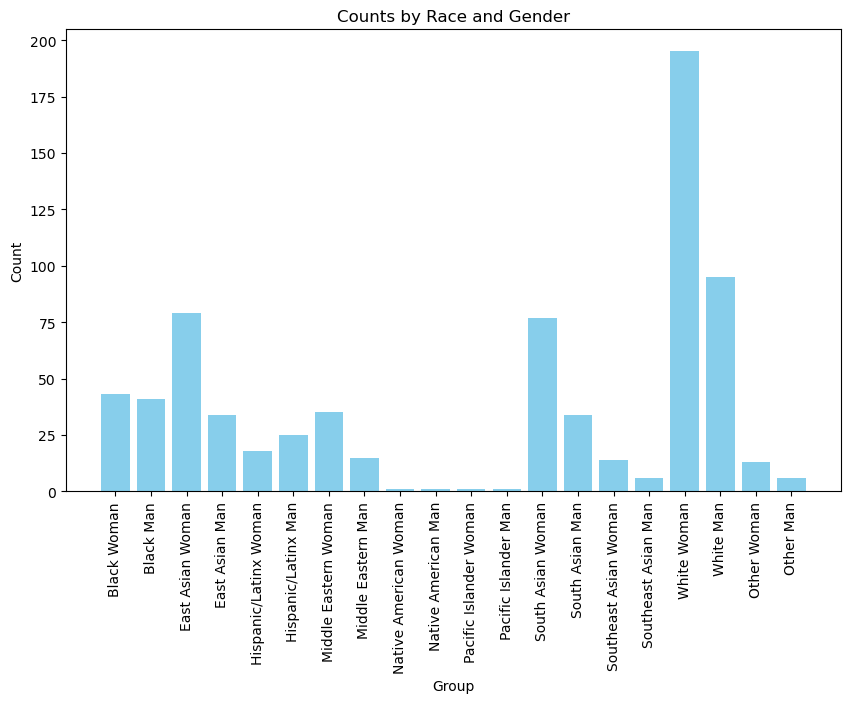

In [21]:
import matplotlib.pyplot as plt

group_counts = []
group_labels = []

for race in race_columns:
    for gender in ['Woman', 'Man']:
        count = data.loc[
            (data['Gender'] == gender) & 
            (data[race] == 1)
        ].shape[0]
        group_counts.append(count)
        group_labels.append(f"{race} {gender}")

plt.figure(figsize=(10, 6))
plt.bar(group_labels, group_counts, color='skyblue')
plt.xticks(rotation=90)
plt.title("Counts by Race and Gender")
plt.ylabel("Count")
plt.xlabel("Group")
plt.show()

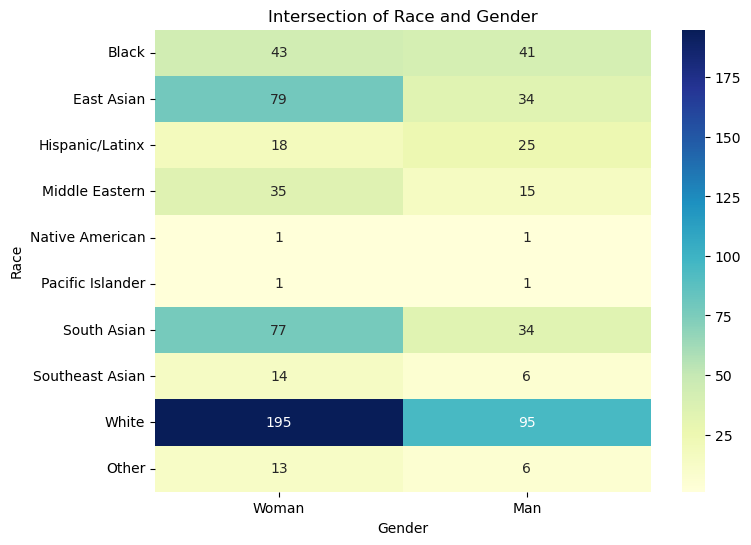

In [22]:
import seaborn as sns
import pandas as pd

heatmap_data = pd.DataFrame(index=race_columns, columns=['Woman', 'Man'])

for race in race_columns:
    for gender in ['Woman', 'Man']:
        heatmap_data.loc[race, gender] = data.loc[
            (data['Gender'] == gender) & 
            (data[race] == 1)
        ].shape[0]

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.astype(int), annot=True, cmap='YlGnBu', fmt='d')
plt.title("Intersection of Race and Gender")
plt.ylabel("Race")
plt.xlabel("Gender")
plt.show()


In [23]:
# View unique entries in column 72 (Gender/Pronouns)
print("Unique entries in column 72 (Gender/Pronouns):")
print(data.iloc[:, 72].unique())

# Import numpy for handling NaN values
import numpy as np

# Define a function to categorize gender entries
def categorize_gender(gender):
    if gender == 'Man':
        return 'Man'
    elif gender == 'Woman':
        return 'Woman'
    elif pd.isna(gender):
        return np.nan  # Keep NaN values as they are
    else:
        return 'Other Gender Identities'  # Group all other gender identities

# Apply the function to column 72
data['Gender Grouped'] = data.iloc[:, 72].apply(categorize_gender)

# Check the result: unique values in the new 'Gender Grouped' column
print("Grouped Gender Categories:")
print(data['Gender Grouped'].unique())

# Get a value count of the grouped genders
grouped_gender_counts = data['Gender Grouped'].value_counts(dropna=False)
print("\nGrouped Gender Breakdown:")
print(grouped_gender_counts)


Unique entries in column 72 (Gender/Pronouns):
['Woman' 'Man' nan 'Genderqueer' 'Prefer not to say' 'Non-binary'
 'Gender non-conforming' 'Non-binary woman' 'Questioning' 'Genderfluid'
 'Agender']
Grouped Gender Categories:
['Woman' 'Man' nan 'Other Gender Identities']

Grouped Gender Breakdown:
Gender Grouped
Woman                      482
Man                        239
Other Gender Identities     64
NaN                         11
Name: count, dtype: int64


In [24]:
# Create a minority group indicator
data['Minority Group'] = data[race_columns].sum(axis=1) > 0  # True if non-White

# Create a column for intersectional group analysis
def intersectional_group(row):
    if row['Gender Grouped'] == 'Woman' and row['Minority Group']:
        return 'Minority Woman'
    elif row['Gender Grouped'] == 'Man' and row['Minority Group']:
        return 'Minority Man'
    elif row['Gender Grouped'] == 'Woman' and not row['Minority Group']:
        return 'Non-Minority Woman'
    elif row['Gender Grouped'] == 'Man' and not row['Minority Group']:
        return 'Non-Minority Man'
    elif row['Gender Grouped'] == 'Other Gender Identities':
        return 'Other Gender Identities'
    else:
        return np.nan  # For NaN gender entries

data['Intersectional Group'] = data.apply(intersectional_group, axis=1)

# Check the intersectional groups
print("\nIntersectional Group Breakdown:")
print(data['Intersectional Group'].value_counts(dropna=False))



Intersectional Group Breakdown:
Intersectional Group
Minority Woman             441
Minority Man               225
Other Gender Identities     64
Non-Minority Woman          41
Non-Minority Man            14
NaN                         11
Name: count, dtype: int64


C:\Users\ashle\AppData\Local\Temp\ipykernel_51476\934206859.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")


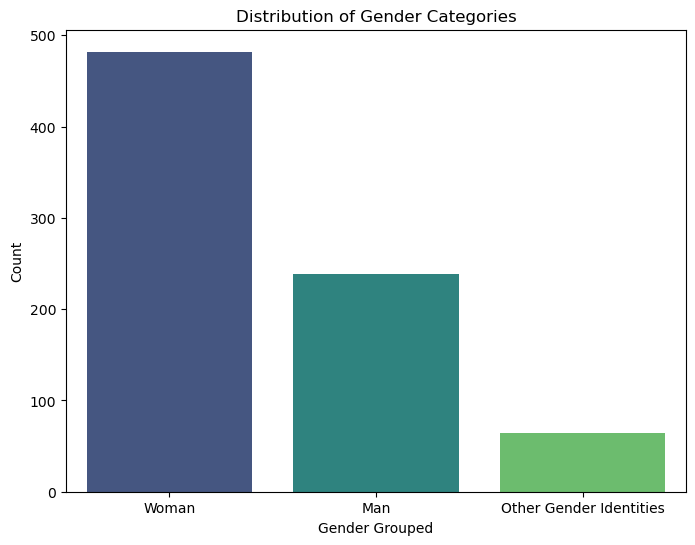

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of Gender Grouped categories
gender_counts = data['Gender Grouped'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title('Distribution of Gender Categories')
plt.xlabel('Gender Grouped')
plt.ylabel('Count')
plt.show()


C:\Users\ashle\AppData\Local\Temp\ipykernel_51476\1683236116.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intersectional_counts.index, y=intersectional_counts.values, palette="coolwarm")


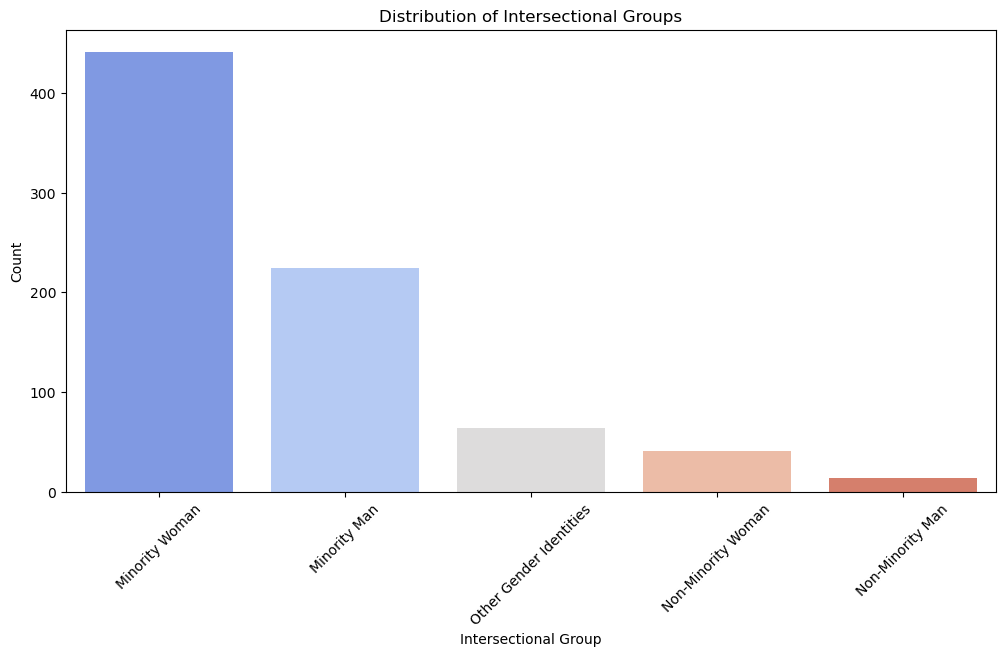

In [29]:
# Count of Intersectional Group categories
intersectional_counts = data['Intersectional Group'].value_counts()

# Create a bar plot for intersectional groups
plt.figure(figsize=(12, 6))
sns.barplot(x=intersectional_counts.index, y=intersectional_counts.values, palette="coolwarm")
plt.title('Distribution of Intersectional Groups')
plt.xlabel('Intersectional Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [30]:
# Melt the race columns for easier plotting
race_data = data[race_columns + ['Gender Grouped']].melt(id_vars='Gender Grouped', var_name='Race', value_name='Count')

# Sum by Gender Grouped and Race
race_gender_counts = race_data.groupby(['Gender Grouped', 'Race'])['Count'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(16, 8))
sns.barplot(data=race_gender_counts, x='Race', y='Count', hue='Gender Grouped', palette="Set2")
plt.title('Race and Gender Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender Grouped')
plt.show()


KeyError: "None of [Index(['BlackGender Grouped', 'East AsianGender Grouped',\n       'Hispanic/LatinxGender Grouped', 'Middle EasternGender Grouped',\n       'Native AmericanGender Grouped', 'Pacific IslanderGender Grouped',\n       'South AsianGender Grouped', 'Southeast AsianGender Grouped',\n       'WhiteGender Grouped', 'OtherGender Grouped'],\n      dtype='object')] are in the [columns]"

In [31]:
print(data.columns)


Index(['Consent', 'I primarily work in:', 'Employer Academia',
       'Employer Industry', 'Academia Role', 'Industry Role',
       'Industry Other Role', 'Highest Degree', 'Career Status',
       'My employer states that they value DEI (whether or not they implement it)',
       'My employer demonstrates a visible commitment to diversity and inclusion',
       'My employer provides programs to support under-represented groups in ML, ex. ERGs, mentoring initiatives, celebration and events, …',
       'Leaders and employees from majority groups participate in DEI programs and events',
       'I am supported to engage in diversity and inclusion initiatives with no penalty, or a positive impact on my work performance.',
       'Members of under-represented groups', 'Internal committees',
       'Senior leadership', 'No DEI programs',
       'My perspective is valued, even when it is different from others',
       'I am treated with respect', 'I can be myself at work',
       'I feel safe 

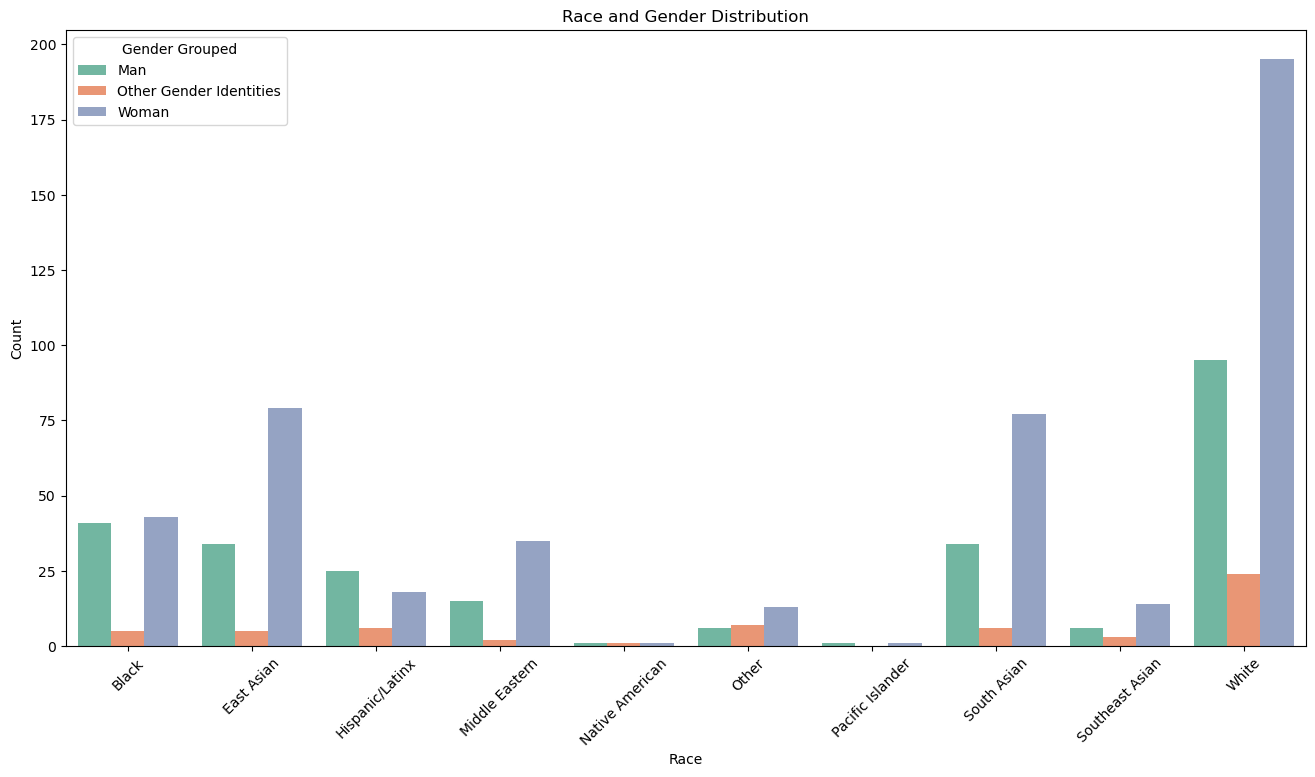

In [34]:
# Define race columns and gender column
race_columns = ['Black', 'East Asian', 'Hispanic/Latinx', 'Middle Eastern',
                'Native American', 'Pacific Islander', 'South Asian', 'Southeast Asian',
                'White', 'Other']
gender_column = 'Gender Grouped'

# Check if all required columns exist in the dataset
valid_columns = [col for col in race_columns if col in data.columns]
if gender_column in data.columns:
    valid_columns.append(gender_column)

# Melt the race columns for easier plotting
race_data = data[valid_columns].melt(
    id_vars=gender_column, 
    var_name='Race', 
    value_name='Count'
)

# Sum by Gender Grouped and Race
race_gender_counts = race_data.groupby(['Gender Grouped', 'Race'])['Count'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(16, 8))
sns.barplot(
    data=race_gender_counts, 
    x='Race', 
    y='Count', 
    hue='Gender Grouped', 
    palette="Set2"
)
plt.title('Race and Gender Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender Grouped')
plt.show()


C:\Users\ashle\AppData\Local\Temp\ipykernel_51476\741320815.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


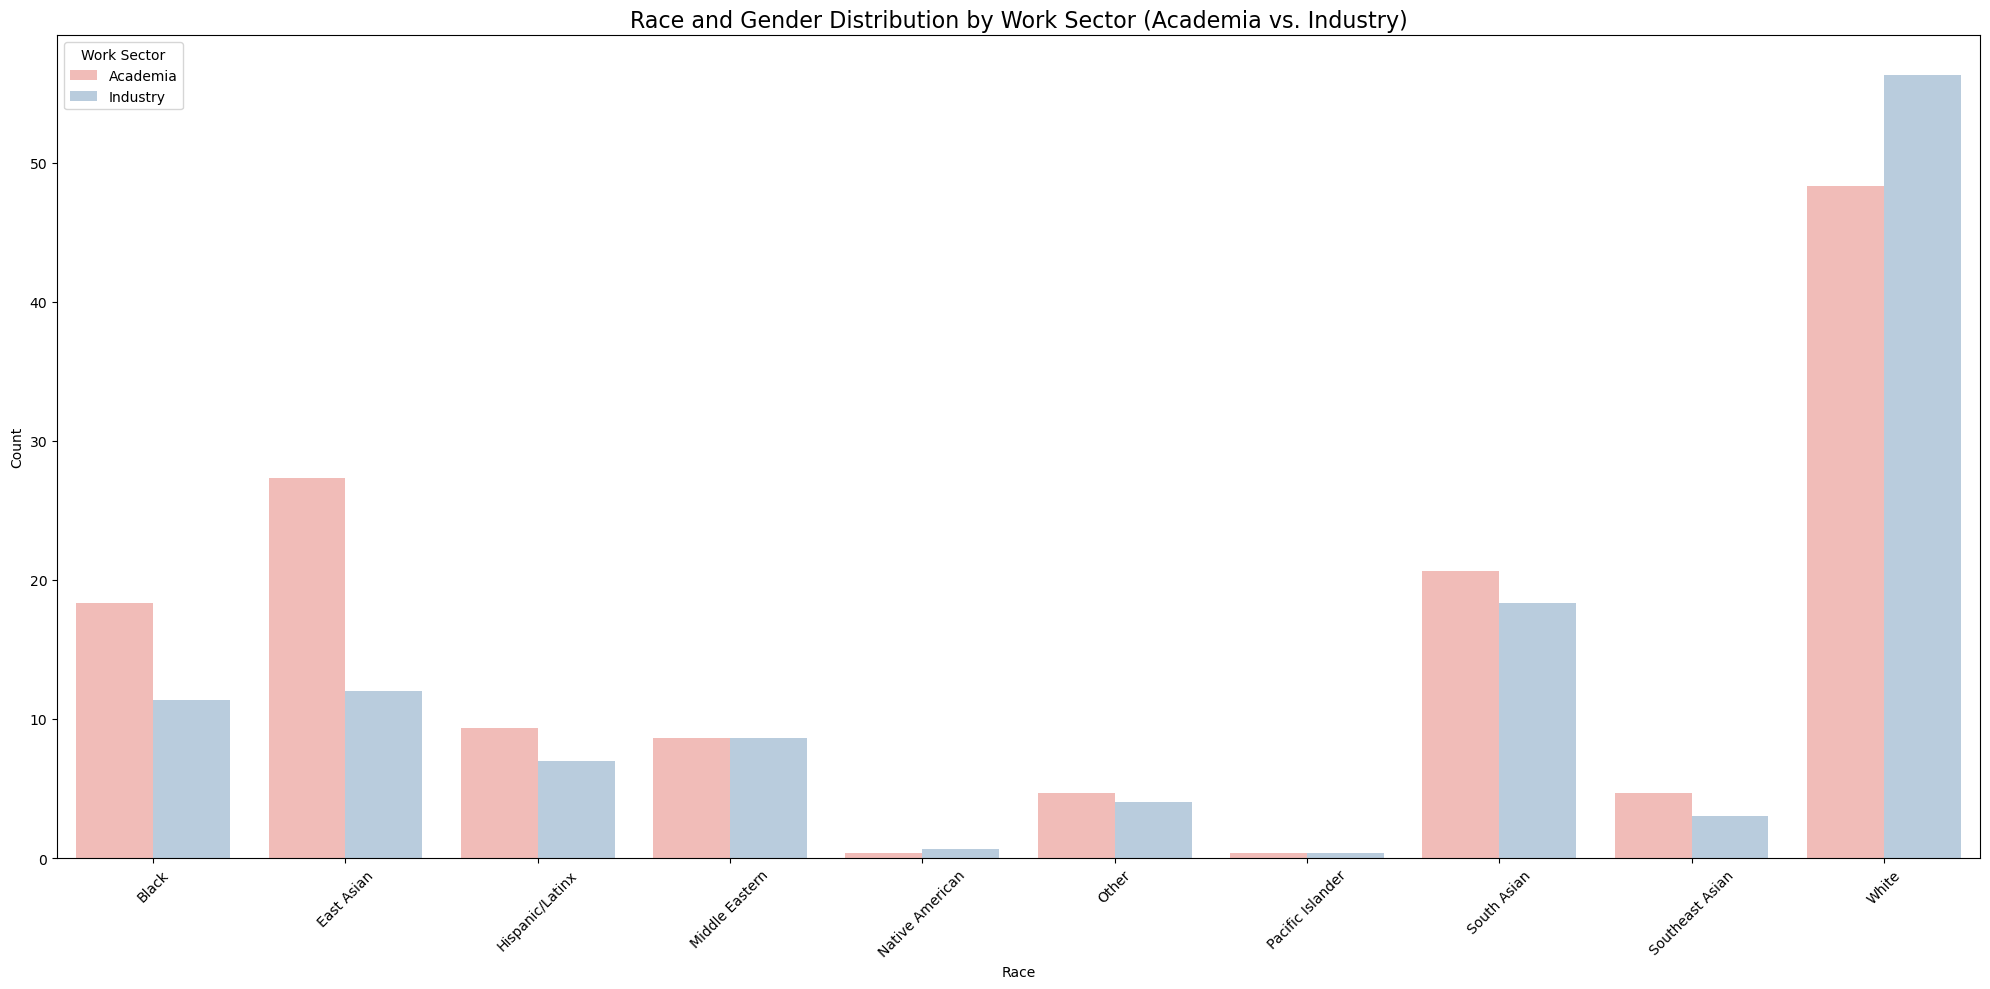

In [37]:
# Define the necessary columns
work_sector_column = 'I primarily work in:'  # Column to break out by academia or industry
race_columns = ['Black', 'East Asian', 'Hispanic/Latinx', 'Middle Eastern',
                'Native American', 'Pacific Islander', 'South Asian', 'Southeast Asian',
                'White', 'Other']
gender_column = 'Gender Grouped'

# Check if all required columns exist in the dataset
valid_columns = [col for col in race_columns if col in data.columns]
if gender_column in data.columns and work_sector_column in data.columns:
    valid_columns.extend([gender_column, work_sector_column])

# Melt the race columns for easier plotting, including work sector
race_data_sector = data[valid_columns].melt(
    id_vars=[gender_column, work_sector_column], 
    var_name='Race', 
    value_name='Count'
)

# Sum by Work Sector, Gender, and Race
race_sector_counts = race_data_sector.groupby(
    [work_sector_column, 'Gender Grouped', 'Race']
)['Count'].sum().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(20, 10))

sns.barplot(
    data=race_sector_counts, 
    x='Race', 
    y='Count', 
    hue=work_sector_column, 
    palette="Pastel1",
    dodge=True,
    ci=None  # Remove error bars
)

plt.title('Race and Gender Distribution by Work Sector (Academia vs. Industry)', fontsize=16)
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Work Sector')
plt.tight_layout()
plt.show()




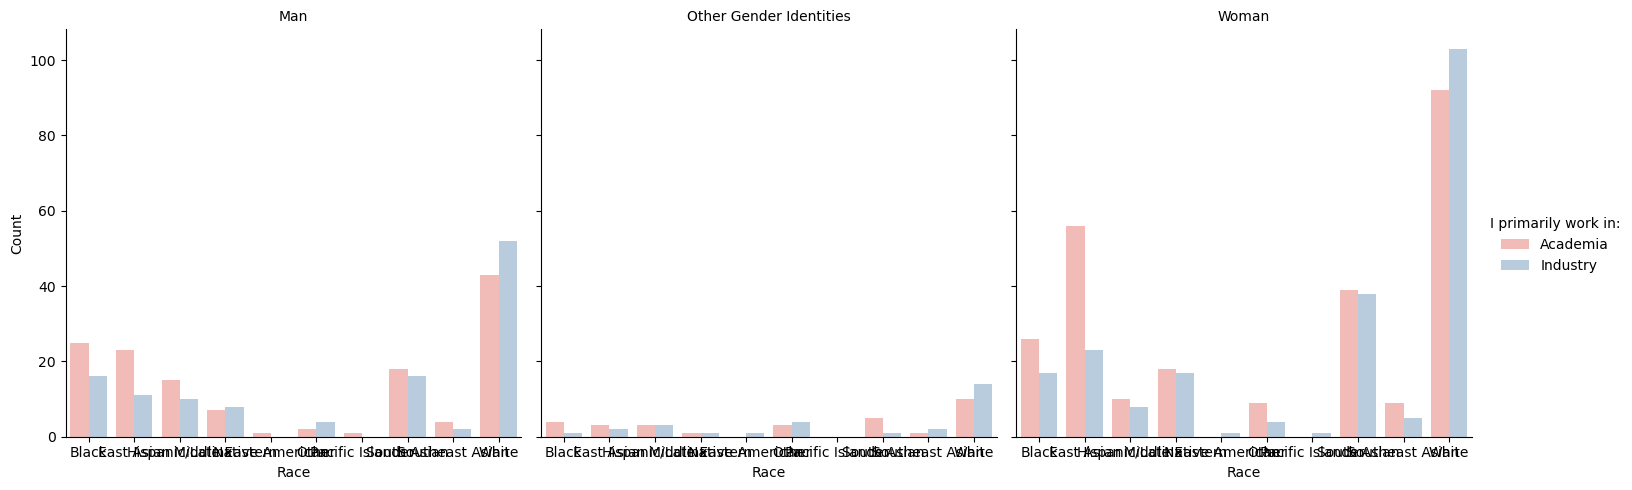

In [41]:
g = sns.catplot(
    data=race_sector_counts, 
    x='Race', 
    y='Count', 
    hue=work_sector_column,  # Keep sector as hue
    col='Gender Grouped',  # Create separate subplots for each gender
    kind='bar', 
    palette="Pastel1", 
    errorbar = None
)
g.set_titles("{col_name}")  # Add titles for clarity
g.set_axis_labels("Race", "Count")


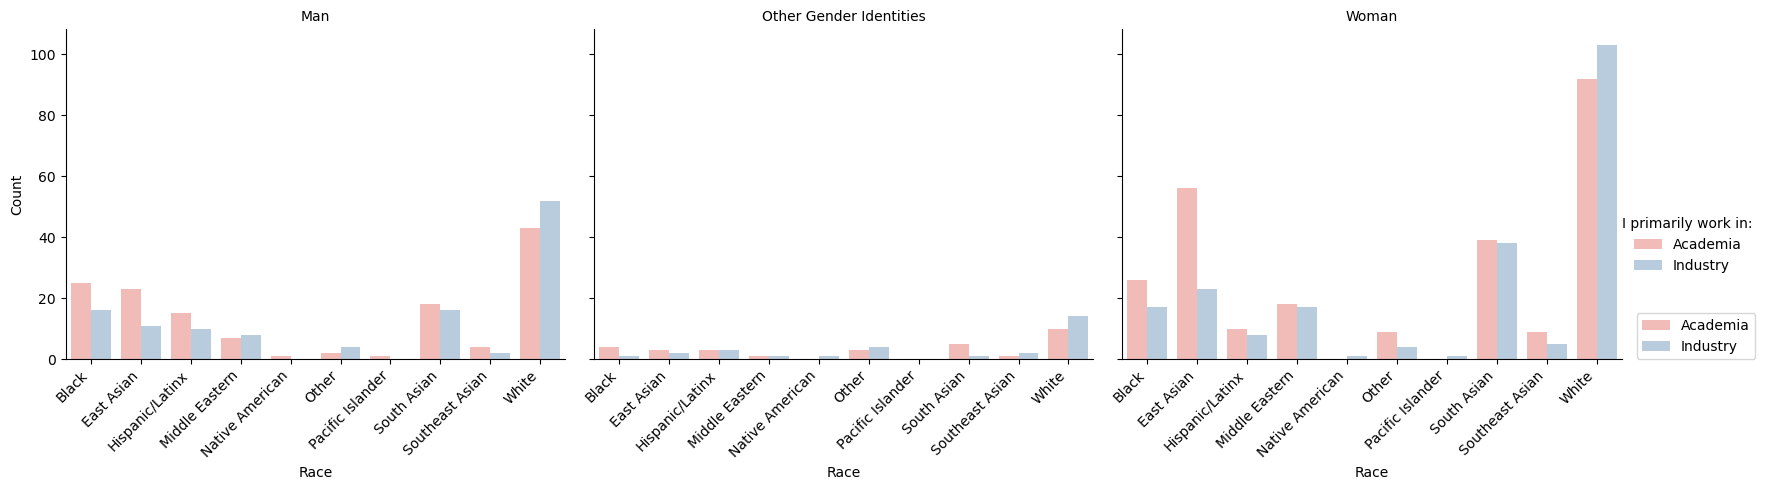

In [49]:
g = sns.catplot(
    data=race_sector_counts, 
    x='Race', 
    y='Count', 
    hue=work_sector_column, 
    col='Gender Grouped', 
    kind='bar', 
    palette="Pastel1", 
    errorbar = None
)
g.set_titles("{col_name}")
g.set_axis_labels("Race", "Count")
g.set_xticklabels(rotation=45, ha='right')  # Rotate labels
plt.tight_layout()
plt.legend(loc=(1.03,0))


In [51]:
data['Career Status'].value_counts()

Career Status
Early career (0-4 years after completing my highest degree in the field)    263
Working towards degree                                                      243
Mid-career (5-15 years after completing my highest degree in the field)     232
Senior (16+ years after completing my highest degree in the field)           53
Name: count, dtype: int64

In [61]:
# Define race columns
race_columns = ['Black', 'East Asian', 'Hispanic/Latinx', 'Middle Eastern', 'Native American', 
                'Pacific Islander', 'South Asian', 'Southeast Asian', 'White', 'Other']

# Melt the race columns to get a long format
race_data = data[race_columns + ['Career Status', 'Gender Grouped']].melt(
    id_vars=['Career Status', 'Gender Grouped'], 
    var_name='Race', 
    value_name='Count'
)

# Drop NaN values to focus only on respondents who selected a race
race_data = race_data.dropna(subset=['Count'])

# Now we can proceed with grouping by Career Status, Race, and Gender
career_status_counts = race_data.groupby(['Career Status', 'Race', 'Gender Grouped']).size().reset_index(name='Count')

# Check the result of the grouping
career_status_counts.head()


,Career Status,Race,Gender Grouped,Count
0,Early career (0-4 years after completing my hi...,Black,Man,70
1,Early career (0-4 years after completing my hi...,Black,Other Gender Identities,18
2,Early career (0-4 years after completing my hi...,Black,Woman,169
3,Early career (0-4 years after completing my hi...,East Asian,Man,70
4,Early career (0-4 years after completing my hi...,East Asian,Other Gender Identities,18


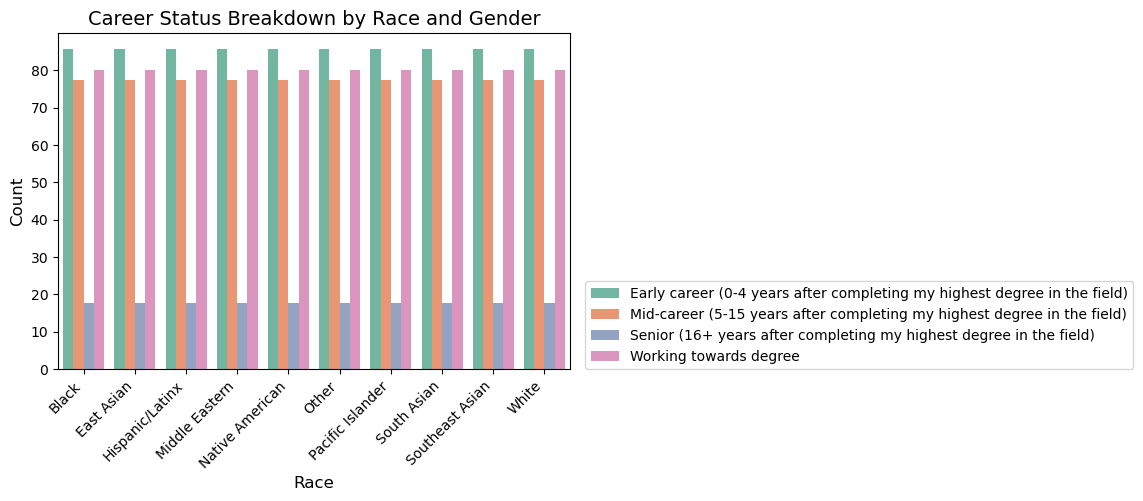

In [62]:
# Create the plot
sns.barplot(
    data=career_status_counts,
    x='Race',
    y='Count',
    hue='Career Status',  # Career Status as hue to color the bars
    palette="Set2",  # Use a color palette for differentiation
    dodge=True,  # Separate bars by Career Status
    errorbar = None
)

# Rotate x-axis labels and adjust labels
plt.xticks(rotation=45, ha='right')
plt.xlabel("Race", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Career Status Breakdown by Race and Gender", fontsize=14)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Adjust these values as needed

plt.legend(loc=(1.03,0))
